In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.stats import norm

### Part 1

In [3]:
# slide 6
U = np.random.uniform(0,1)
if U < 1/6:
    X = 1
elif U < 1/2:
    X = 2
else:
    X = 3

print(X)

2


In [4]:
# slide 9
k = 50
U = np.random.uniform(0,1)
X = np.floor(k*U)
print(int(X))

38


In [5]:
# slide 17
n = 10
p = 0.4
U = np.random.uniform(0,1,n)
X = np.ceil(np.log(1-U) / np.log(p)).astype(int)
print(X)

[2 1 2 2 1 1 3 1 5 1]


### Part 2

In [6]:
# slide 5
n = 5
U = np.random.uniform(0,1,n)
X = (16*U)**(1/4)
print(X)

[1.68128818 1.95316595 1.81803226 1.8777327  1.77351736]


[1.88273323 0.07380006 0.51070835 0.10767918 0.05783358 0.12854404
 0.08326821 0.96908555 1.43964398 0.69074569 0.05196334 0.1266028
 0.46386415 0.24279906 0.22312799 0.14625953 0.86245816 0.02708196
 1.45722703 1.17154148 0.32560953 0.97408159 0.05753099 0.05337047
 0.28154027 0.08356782 0.10489684 1.25201399 1.10728748 0.31897847
 0.13695319 0.0403414  0.13657756 0.46393273 0.08921229 0.3430957
 0.47500754 0.00508305 0.18483225 0.15435811 0.01209979 0.94867752
 0.25659409 0.57940772 0.07399854 1.2479692  0.71530376 0.10130857
 1.37012774 0.52351592 0.12823684 0.74919619 0.16801162 0.58194205
 0.54863672 0.24331456 0.45525332 1.13413566 0.11078822 0.48932022
 0.37388296 0.30031168 1.16311437 0.31664216 0.3697078  0.29313087
 1.41393172 0.61390409 0.28675605 0.06162918 0.03654531 0.56122014
 0.65952082 0.23614014 0.09033476 2.89557398 0.51505818 0.39172332
 0.01371534 0.12892279 0.305341   0.43259521 0.21628864 0.88137267
 1.26060531 0.88142787 0.41708338 0.14171422 1.28764198 0.943022

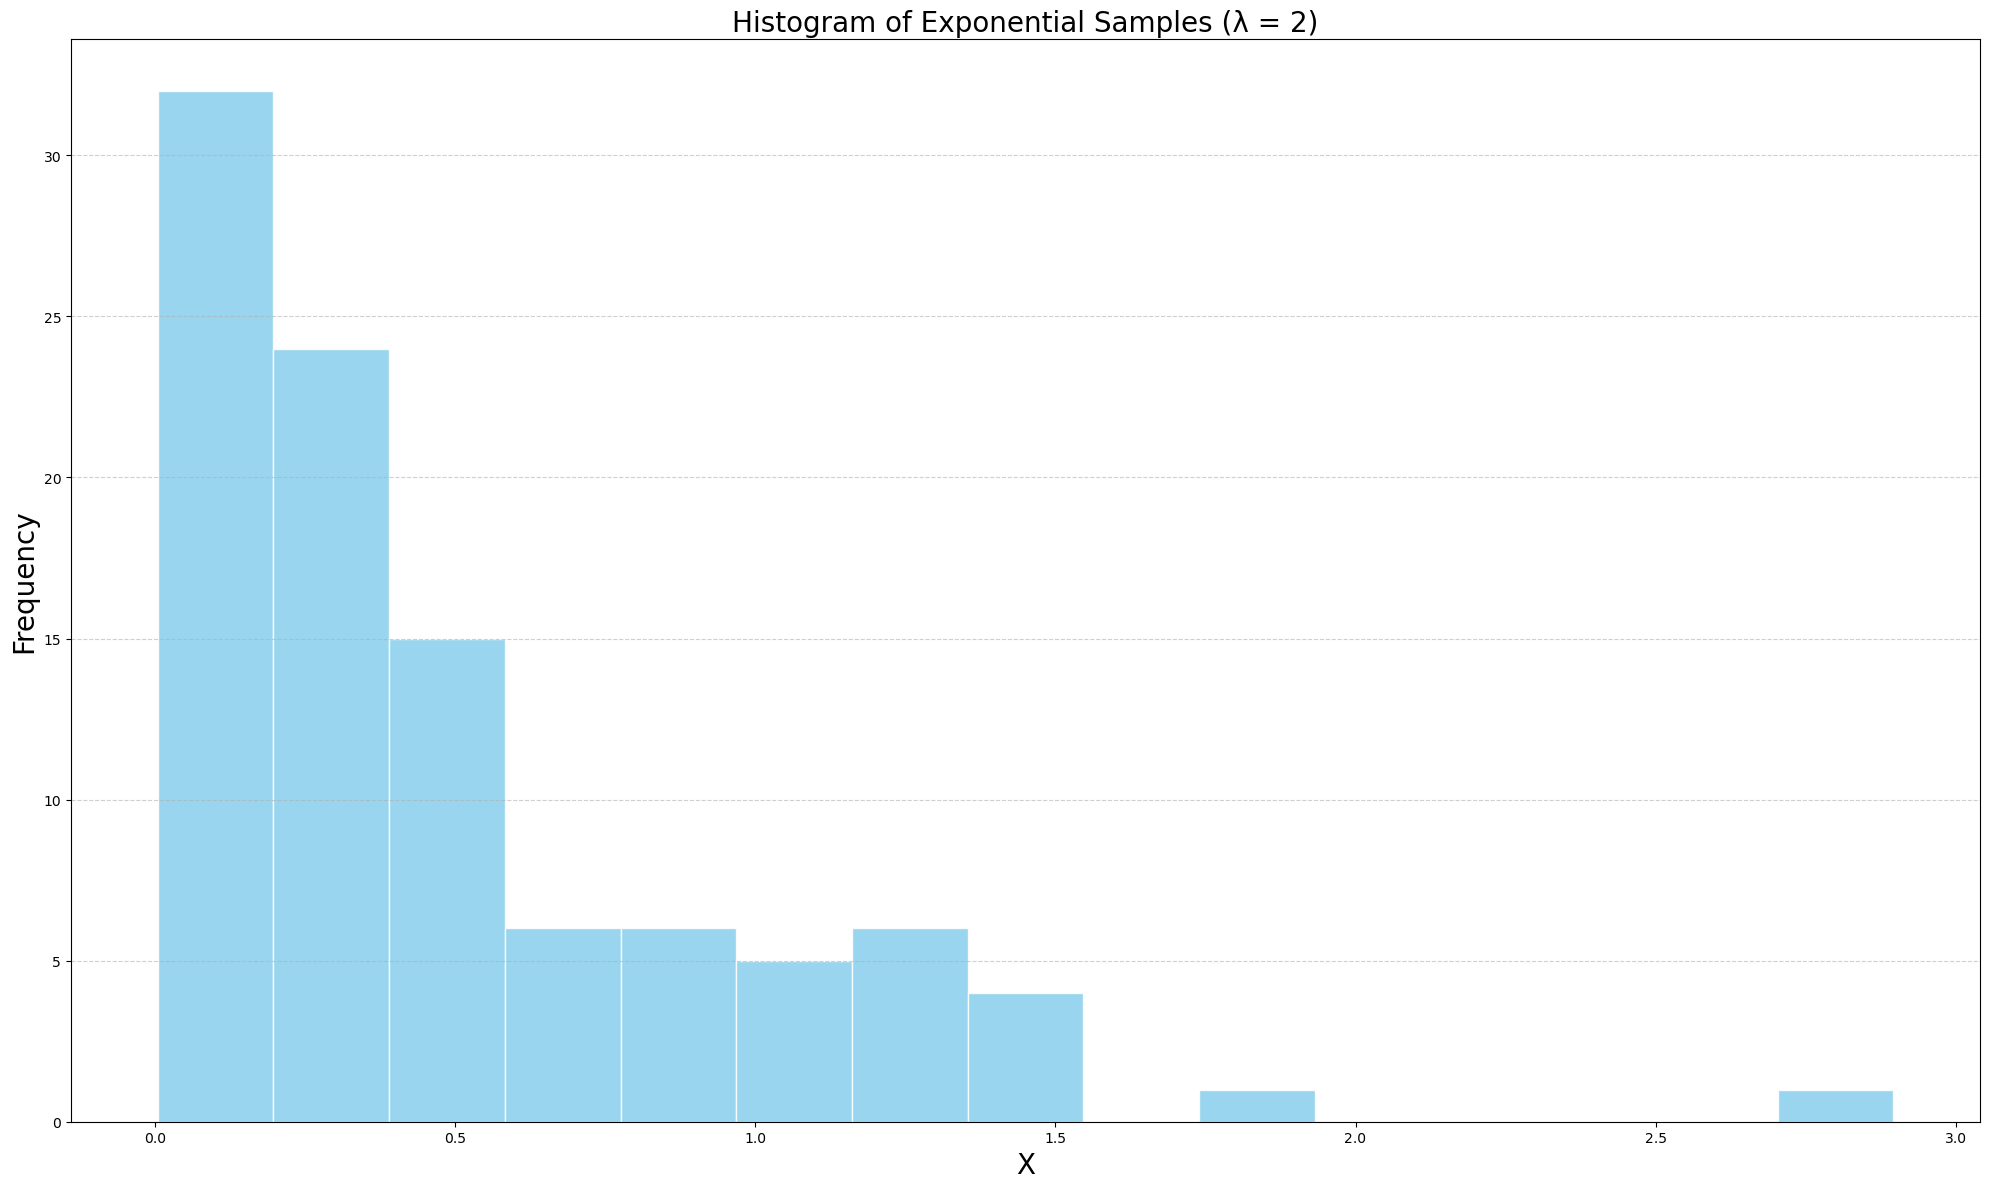

In [7]:
# slide 7
n = 100
lambda_ = 2
U = np.random.uniform(0,1,n)
X = -np.log(1-U) / lambda_
print(X)

plt.figure(figsize=(20, 12))
plt.hist(X, bins=15, color="skyblue", edgecolor="white", alpha=0.85)
plt.title("Histogram of Exponential Samples (λ = 2)", fontsize=20)
plt.xlabel("X", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Part 3

1013


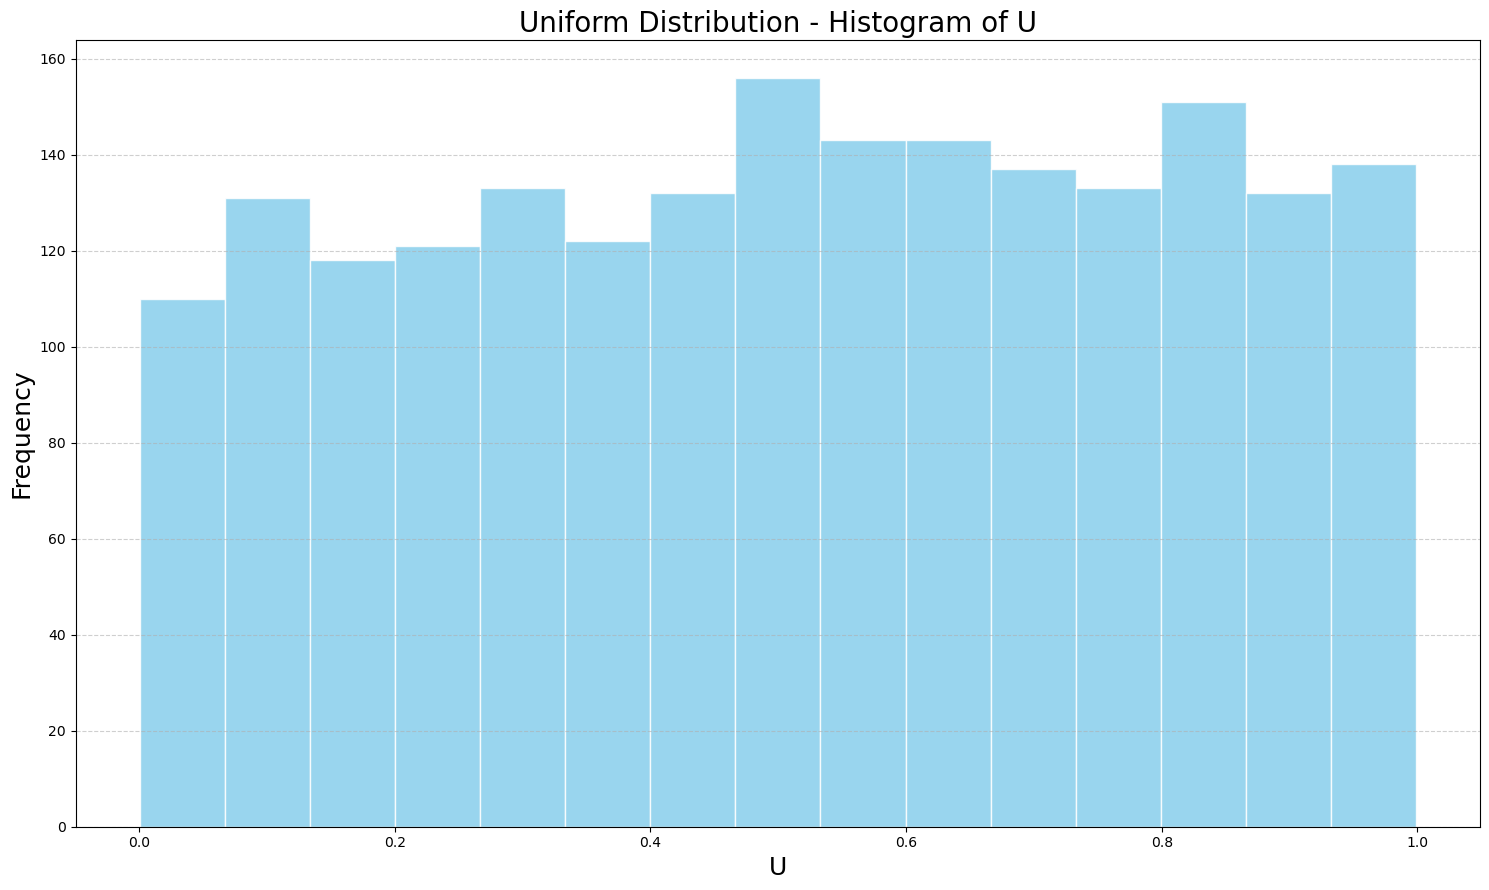

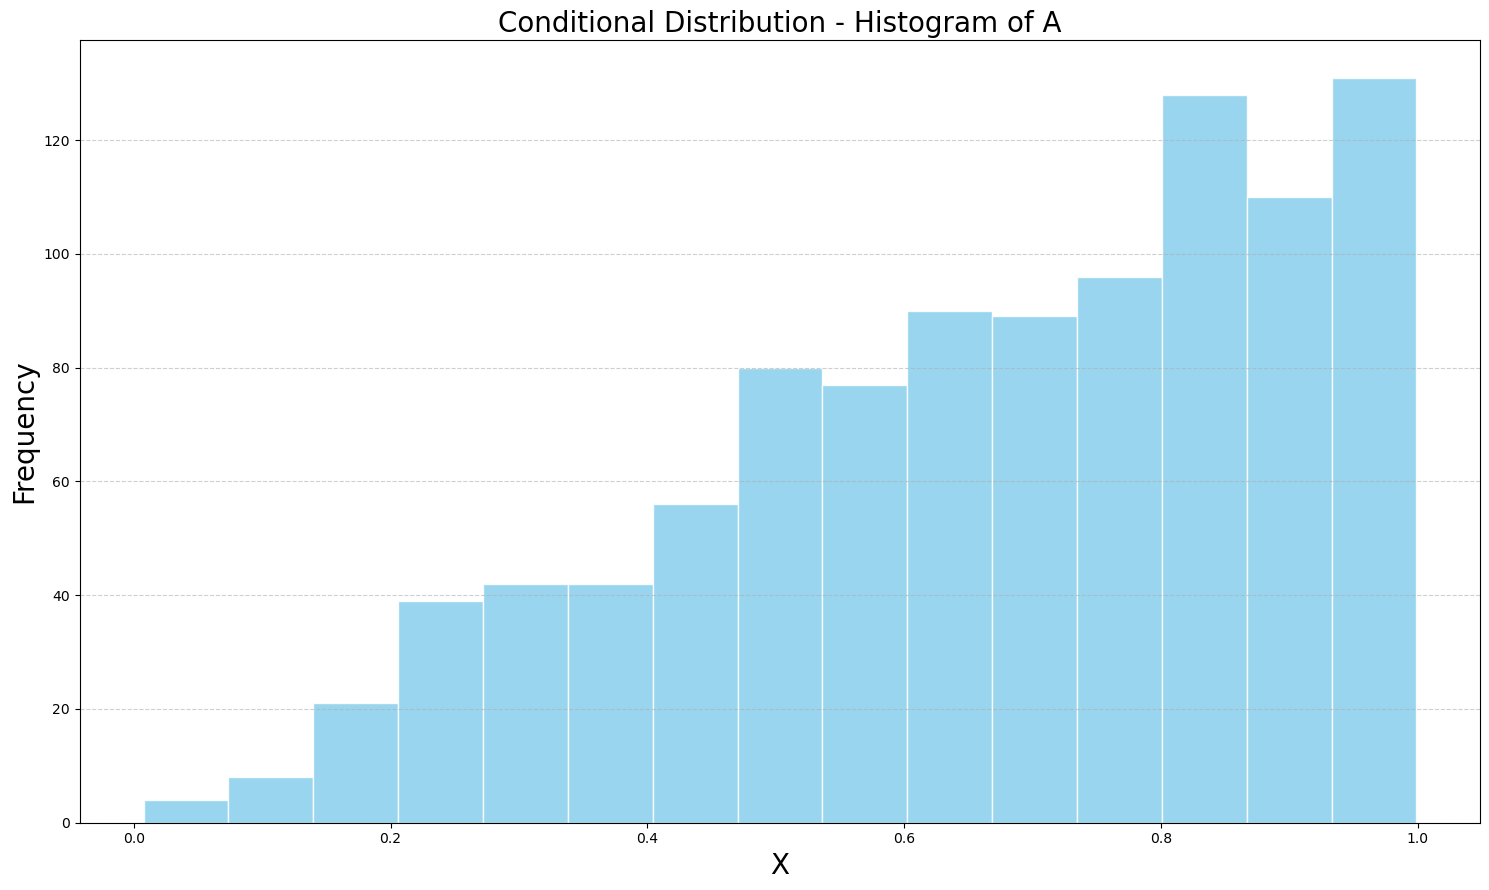

In [8]:
# slide 11
counter = 0
num_sims = 2000
U = []
A = []

for i in range(num_sims):
    u = np.random.uniform()
    d = np.random.uniform()
    U.append(u)
    if d < u:
        A.append(u)
        counter += 1

print(counter)

plt.figure(figsize=(15, 9))
plt.hist(U, bins=15, color="skyblue", edgecolor="white", alpha=0.85)
plt.title("Uniform Distribution - Histogram of U", fontsize=20)
plt.xlabel("U", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 9))
plt.hist(A, bins=15, color="skyblue", edgecolor="white", alpha=0.85)
plt.title("Conditional Distribution - Histogram of A", fontsize=20)
plt.xlabel("X", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

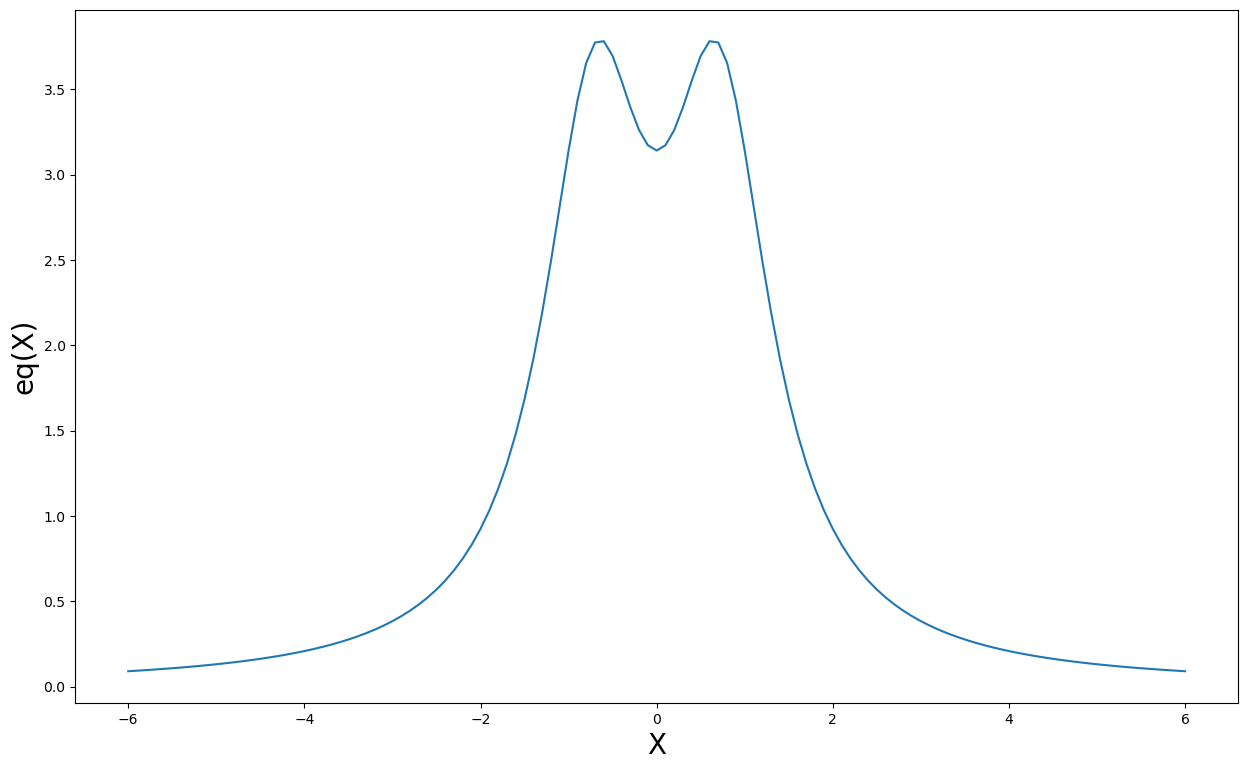

In [9]:
# slide 16
x = np.arange(-6, 6.1, 0.1)
eq = np.pi * (1 + x**2) / (1 + x**4)

plt.figure(figsize=(15, 9))
plt.plot(x, eq)
plt.xlabel("X", fontsize=20)
plt.ylabel("eq(X)", fontsize=20)
plt.show()

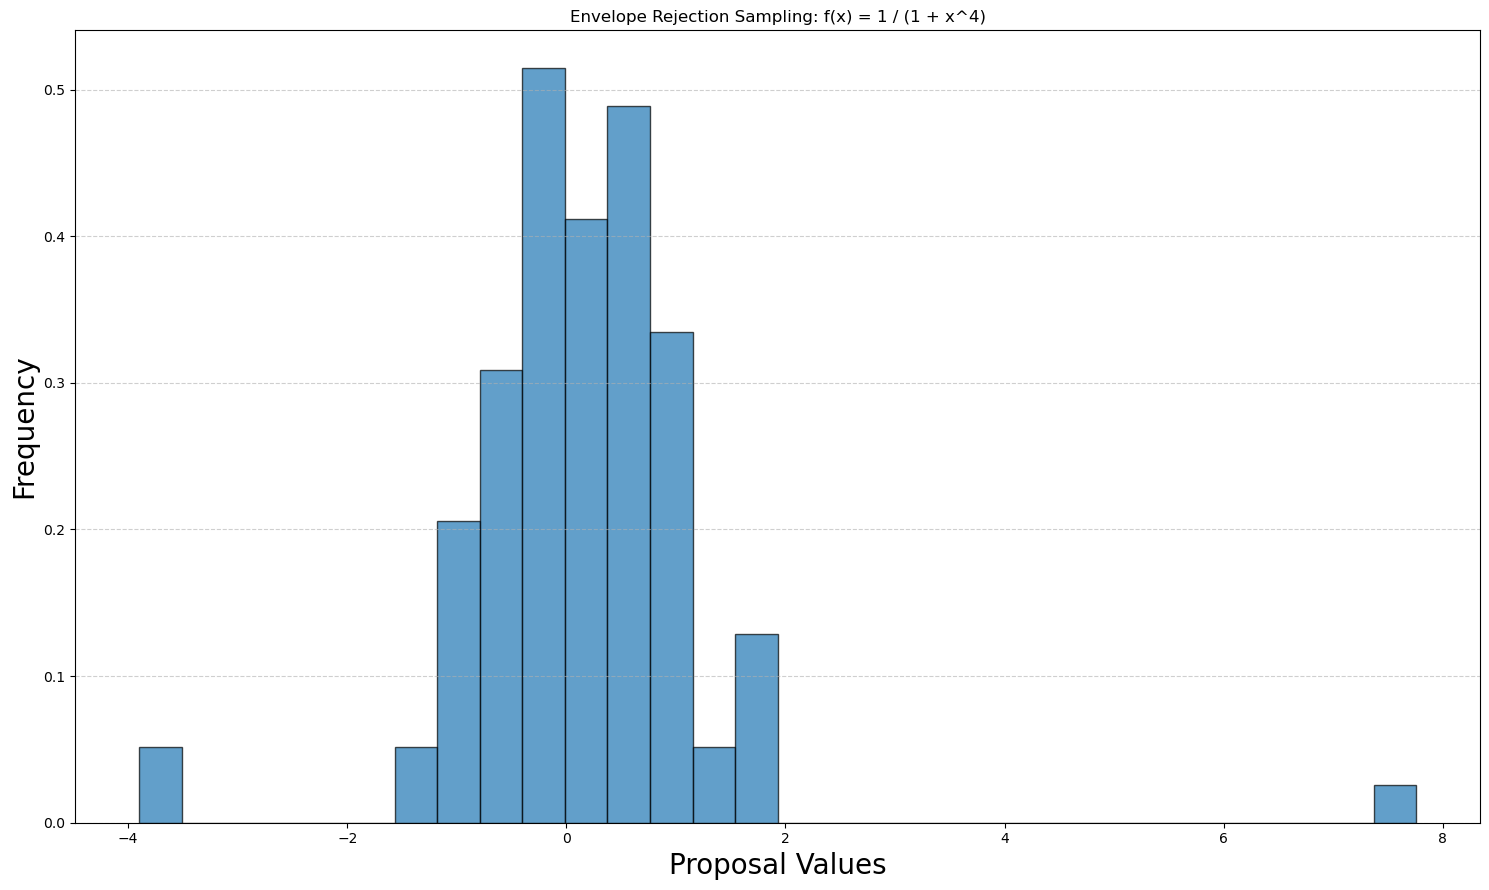

In [22]:
# slide 17
n = 100
c = 3.8
target_samples = []
counter = 0

# Accept-reject sampling
while len(target_samples) < n:
    U = np.random.uniform(size=2)
    
    # Cauchy proposal via inverse CDF
    Y = np.tan(np.pi * (U[0] - 0.5))
    
    f = 1 / (1 + Y**4)
    g = 1 / (np.pi * (1 + Y**2))
    
    if U[1] < f / (c * g):
        target_samples.append(Y)

plt.figure(figsize=(15, 9))
plt.hist(target_samples, bins=30, density=True, alpha=0.7, edgecolor="black")
plt.title("Envelope Rejection Sampling: f(x) = 1 / (1 + x^4)")
plt.xlabel("Proposal Values", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Generated 500 samples
Total proposals: 836
Acceptance rate: 0.598


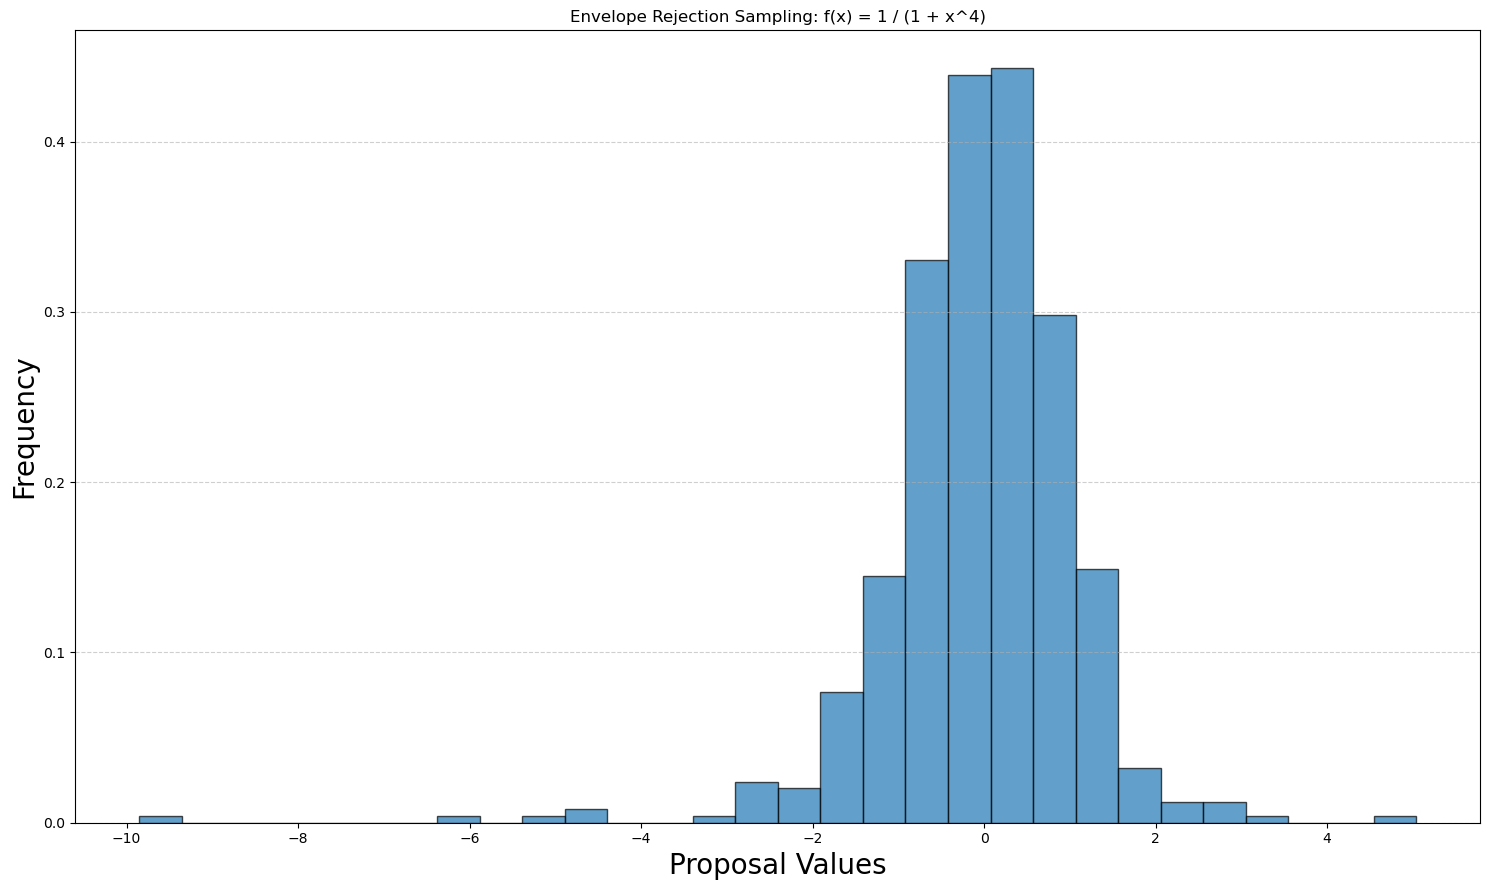

In [25]:
# target (unnormalized) density
def f(x):
    return 1.0 / (1.0 + x**4)

# proposal density (Cauchy)
def g(x):
    return 1.0 / (np.pi * (1.0 + x**2))

c = 3.8
n_samples = 500
samples = []
trials = 0

while len(samples) < n_samples:
    # sample from proposal (Cauchy)
    y = np.random.standard_cauchy()
    
    # sample uniform
    u = np.random.uniform()
    
    # acceptance rule
    if u <= f(y) / (c * g(y)):
        samples.append(y)
    
    trials += 1

samples = np.array(samples)

print(f"Generated {n_samples} samples")
print(f"Total proposals: {trials}")
print(f"Acceptance rate: {n_samples / trials:.3f}")

# plot
plt.figure(figsize=(15, 9))
plt.hist(samples, bins=30, density=True, alpha=0.7, edgecolor="black")
plt.title("Envelope Rejection Sampling: f(x) = 1 / (1 + x^4)")
plt.xlabel("Proposal Values", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### Part 4

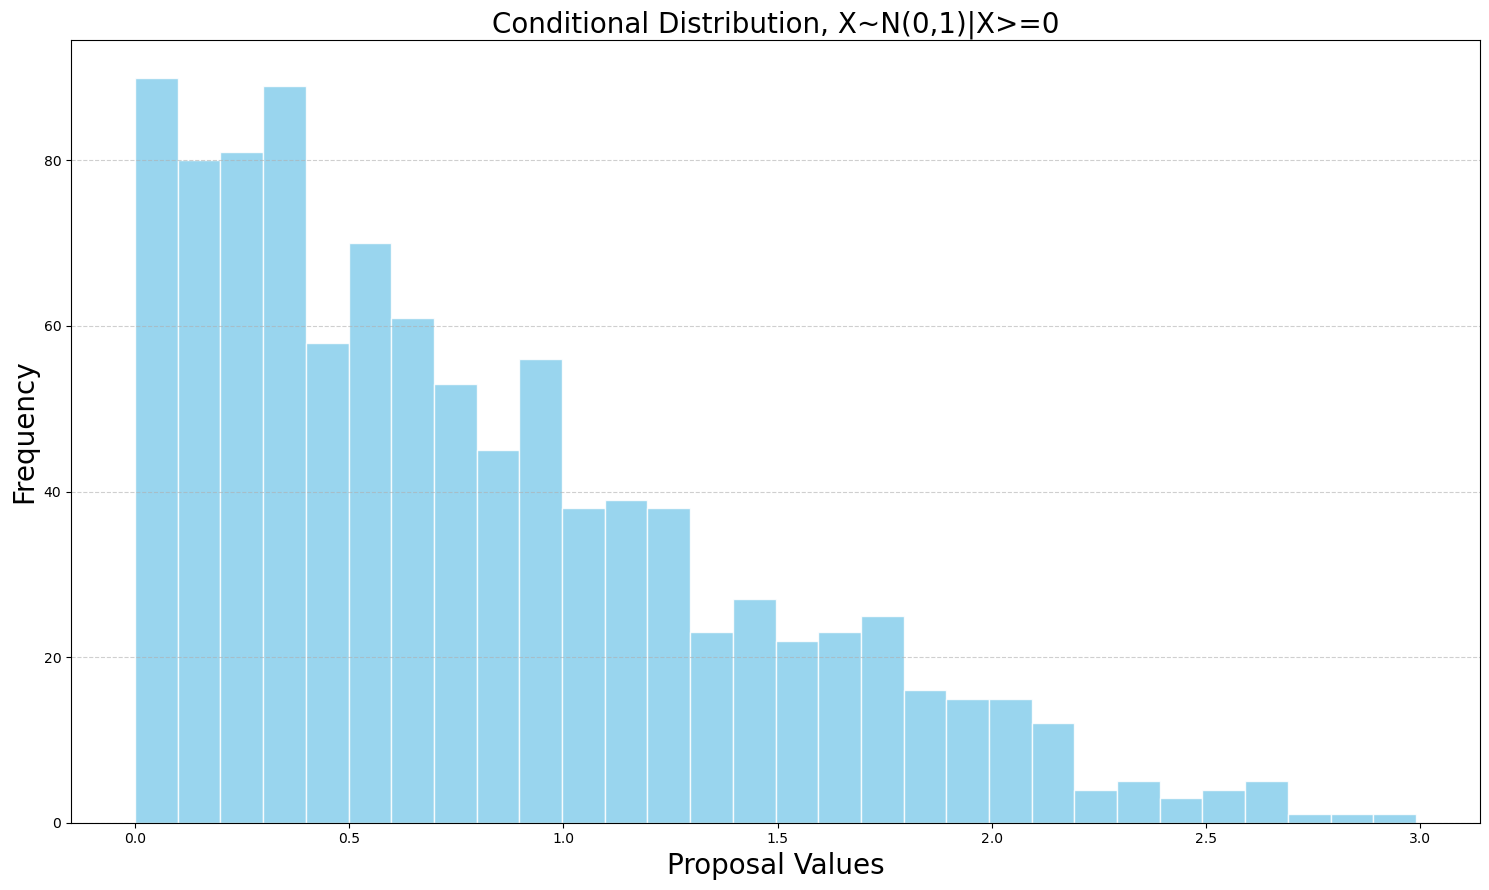

In [11]:
# slide 2
n = 1000
counter = 0
target_sample = []
mu, sigma = 0, 1

while counter < n:
    proposal = np.random.normal(loc=mu, scale=sigma)
    if proposal > 0:
        target_sample.append(proposal)
        counter += 1

plt.figure(figsize=(15, 9))
plt.hist(target_sample, bins=30, color="skyblue", edgecolor="white", alpha=0.85)
plt.title("Conditional Distribution, X~N(0,1)|X>=0", fontsize=20)
plt.xlabel("Proposal Values", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

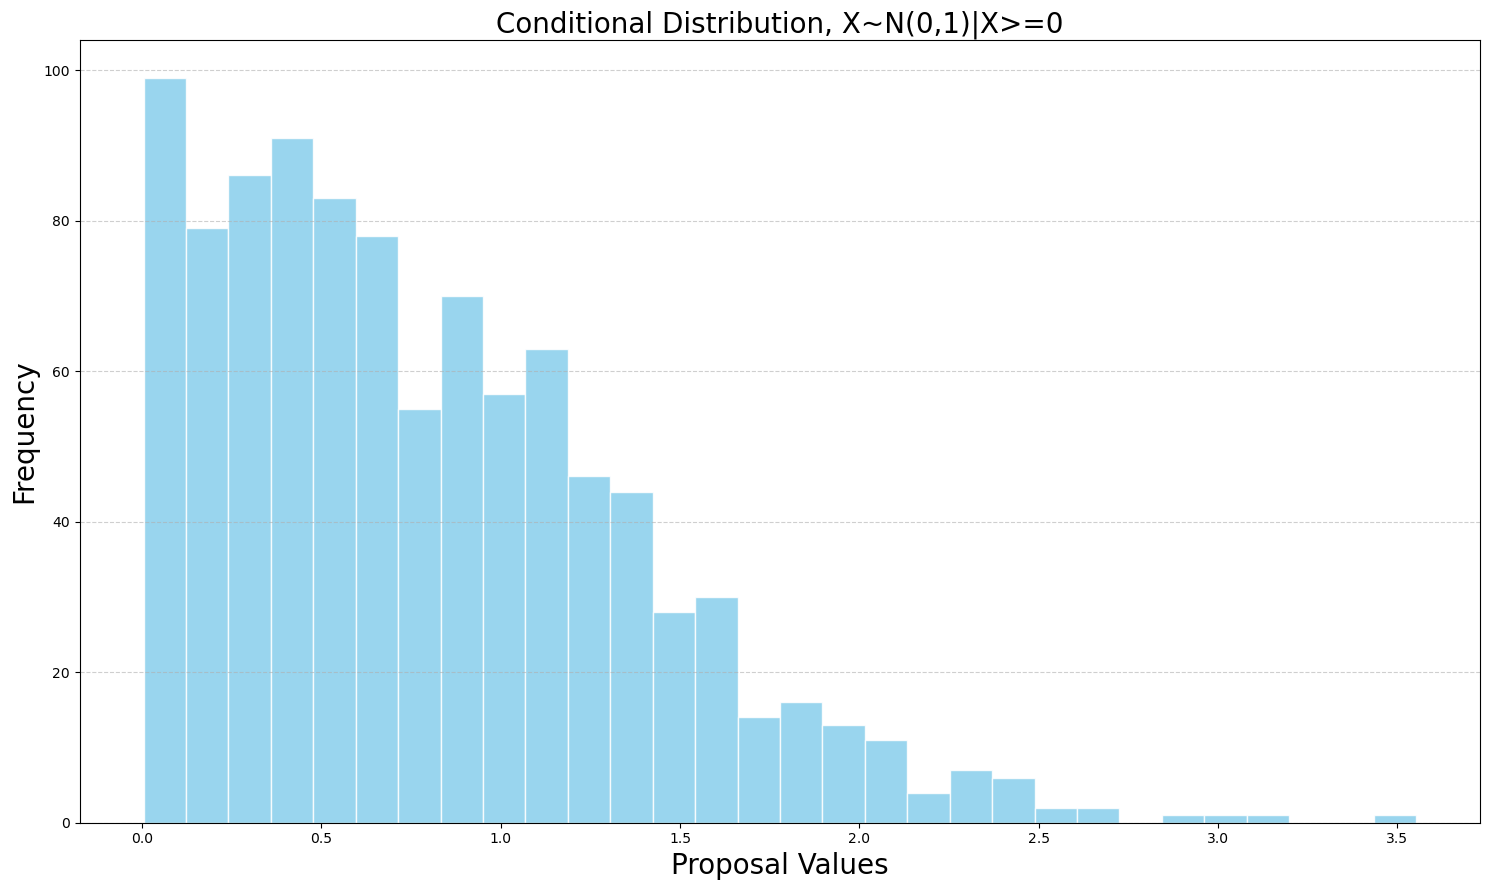

In [12]:
# slide 3
n = 1000
mu, sigma = 0, 1
samples = np.random.normal(loc=mu, scale=sigma, size=n*2)
target_sample = samples[samples > 0]
target_sample = target_sample[:n]

plt.figure(figsize=(15, 9))
plt.hist(target_sample, bins=30, color="skyblue", edgecolor="white", alpha=0.85)
plt.title("Conditional Distribution, X~N(0,1)|X>=0", fontsize=20)
plt.xlabel("Proposal Values", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

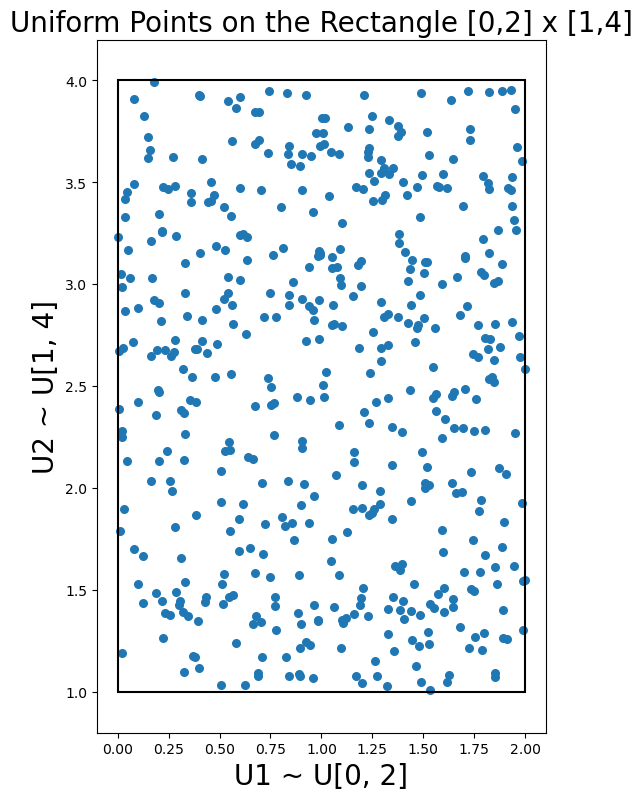

In [13]:
# slide 8
# number of points
n = 500
X = np.random.uniform(0, 2, n)
Y = np.random.uniform(1, 4, n)

# create the scatter plot
fig, ax = plt.subplots(figsize=(15,9))
ax.scatter(X, Y, s=30, alpha=1)
rect = Rectangle((0, 1), 2, 3, fill=False, linewidth=1.5)
ax.add_patch(rect)

# add labels and title
ax.set_xlabel('U1 ~ U[0, 2]', fontsize=20)
ax.set_ylabel('U2 ~ U[1, 4]', fontsize=20)
ax.set_title('Uniform Points on the Rectangle [0,2] x [1,4]', fontsize=20)
ax.set_xlim(-0.1, 2.1)
ax.set_ylim(0.8, 4.2)
ax.set_aspect('equal', adjustable='box')
plt.show()

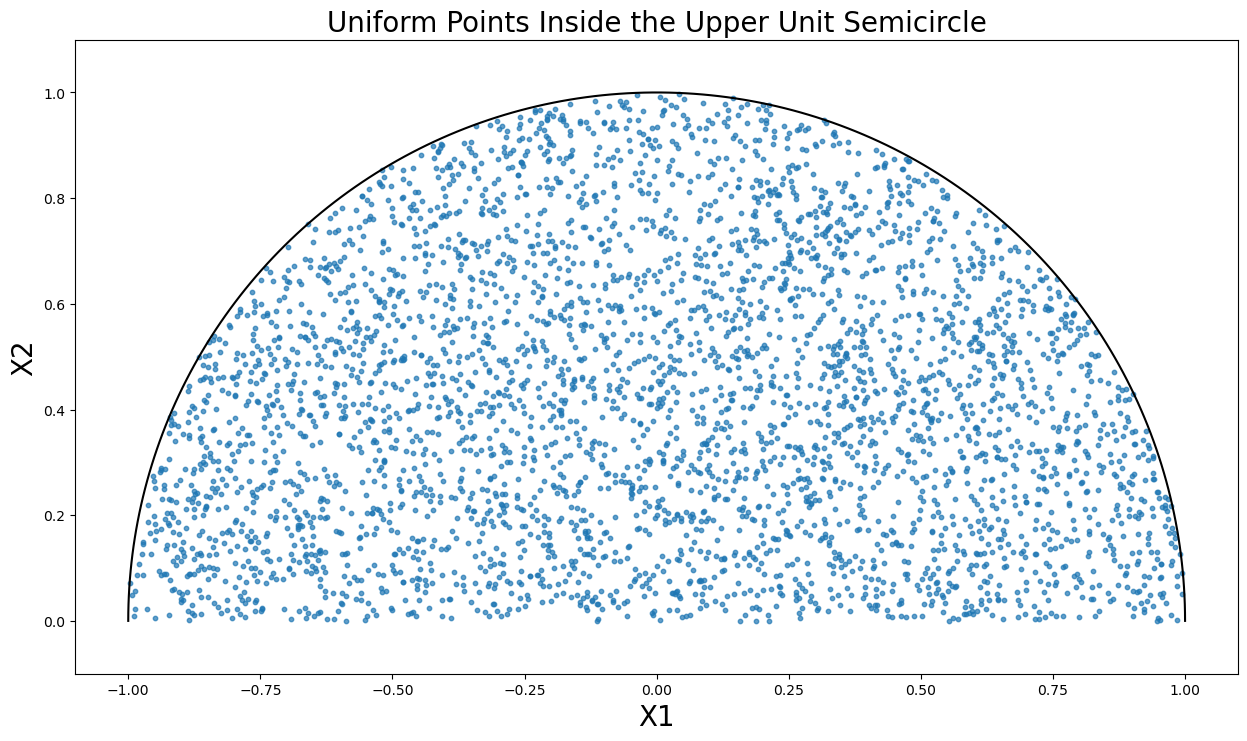

In [14]:
# ---------------------------
# Algorithm: Rejection Sampling Inside Unit Semicircle
# ---------------------------
def sample_semicircle(n, seed=None):
    """
    Generate n points uniformly distributed inside the upper semicircle
    defined by x^2 + y^2 < 1 and y >= 0 using rejection sampling.
    
    Args:
        n (int): Number of candidate points to generate (before rejection)
        seed (int, optional): Random seed for reproducibility
    
    Returns:
        X1, X2 (arrays): Coordinates of accepted points inside the semicircle
    """
    if seed is not None:
        np.random.seed(seed)
    
    U1 = np.random.uniform(-1, 1, n)
    U2 = np.random.uniform(0, 1, n)
    mask = U1**2 + U2**2 < 1
    X1 = U1[mask]
    X2 = U2[mask]
    
    return X1, X2

# generate points
n = 5000
X1, X2 = sample_semicircle(n, seed=42)

# plot
fig, ax = plt.subplots(figsize=(15, 9))
ax.scatter(X1, X2, s=10, alpha=0.7)
theta = np.linspace(0, np.pi, 200)
ax.plot(np.cos(theta), np.sin(theta), linewidth=1.5,color='black')
ax.set_xlabel('X1', fontsize=20)
ax.set_ylabel('X2', fontsize=20)
ax.set_title('Uniform Points Inside the Upper Unit Semicircle', fontsize=20)
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-0.1, 1.1)
plt.show()

### Part 5

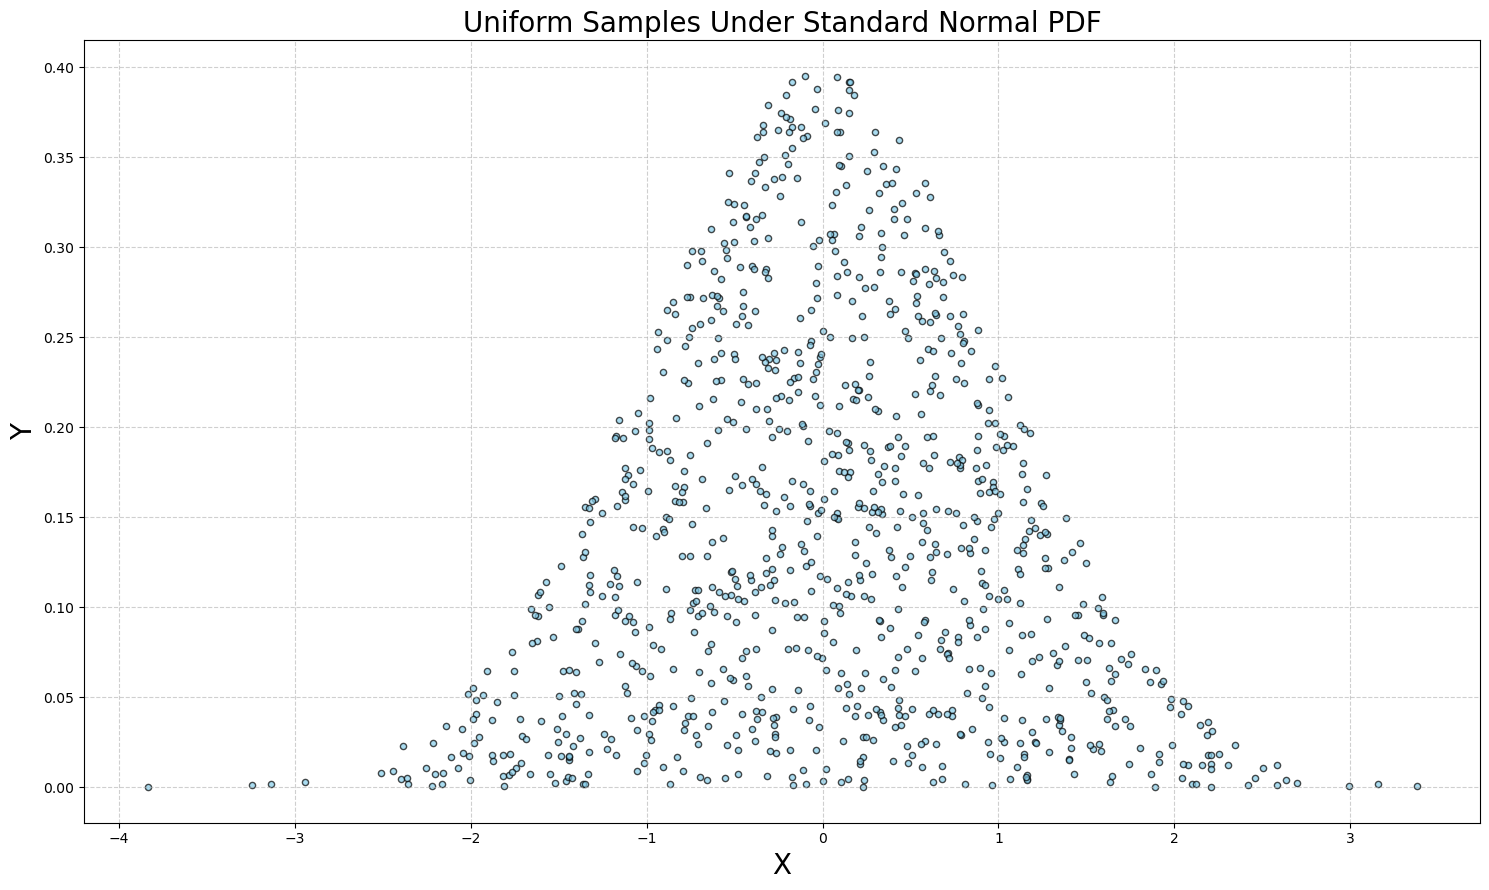

In [15]:
# slide 4
n = 1000
X = np.random.normal(size=n)
Z = norm.pdf(X)
Y = np.random.uniform(0, Z)

plt.figure(figsize=(15, 9))
plt.scatter(X, Y, color='skyblue', s=20, alpha=0.7, edgecolor='k')  # filled dots with alpha
plt.title('Uniform Samples Under Standard Normal PDF', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Part 6

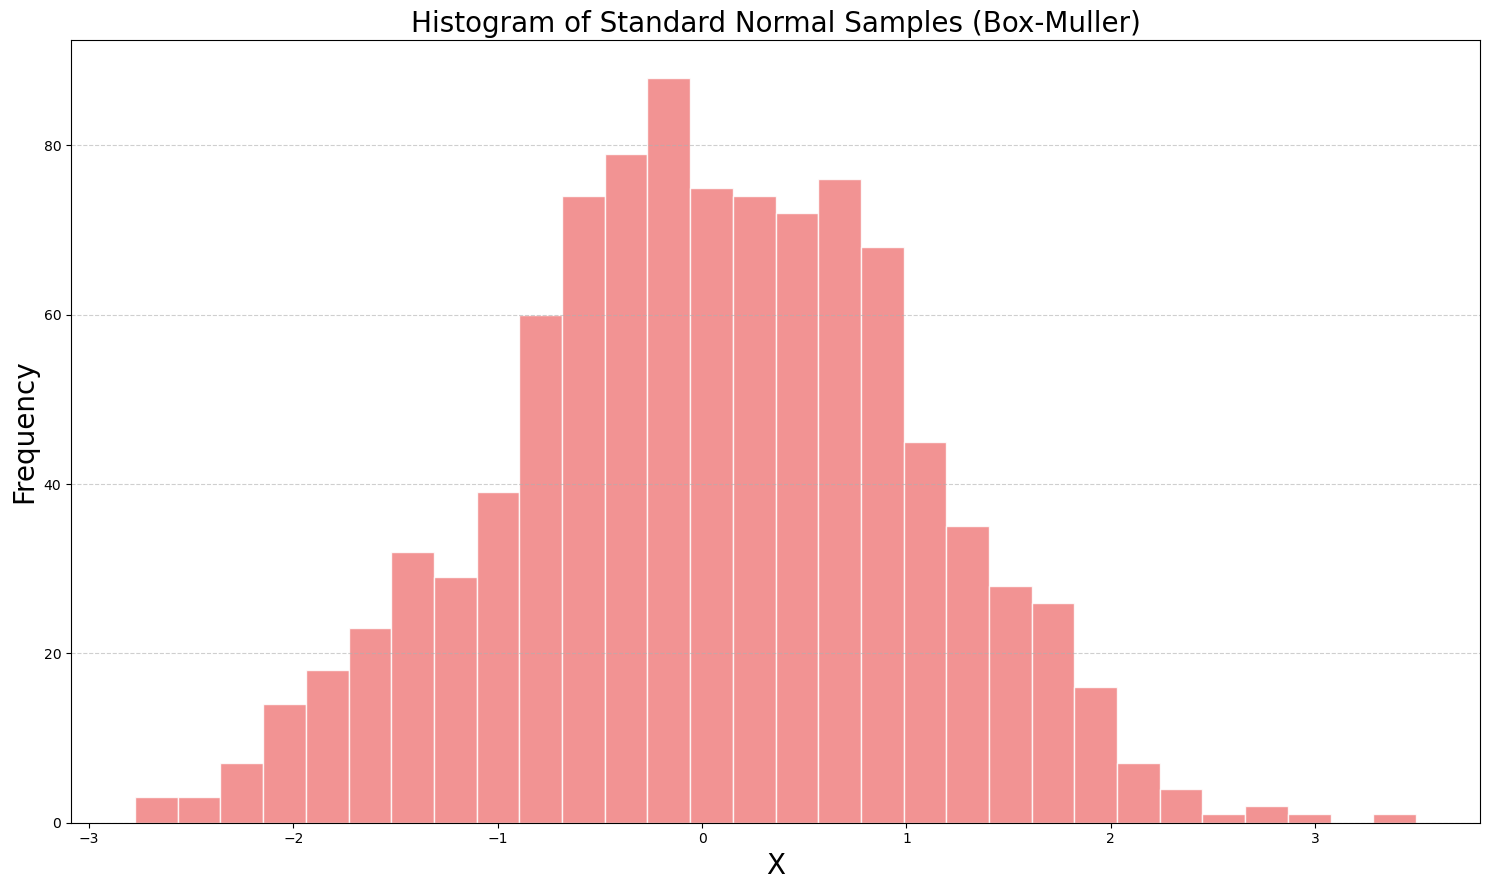

In [16]:
# slide 5
n = 1000
m = n // 2
X = np.zeros(n)
R = np.zeros(m)
U = np.random.uniform(0,1,m)
Theta = np.random.uniform(0, 2*np.pi, m)

# Box-Muller transform
for i in range(m):
    R[i] = np.sqrt(-2 * np.log(U[i]))
    X[2*i] = R[i] * np.cos(Theta[i])
    X[2*i+1] = R[i] * np.sin(Theta[i])

# Plot histogram nicely
plt.figure(figsize=(15,9))
plt.hist(X, bins=30, color='lightcoral', edgecolor='white', alpha=0.85)
plt.title('Histogram of Standard Normal Samples (Box-Muller)', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()